# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)

In [5]:
df = pd.read_csv('/content/bank-additional.csv', sep = ';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [8]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

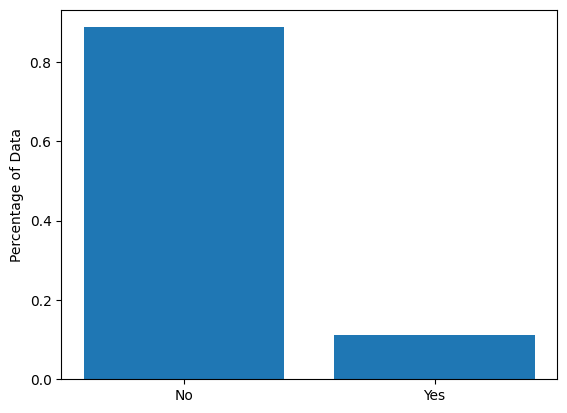

In [10]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [11]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [12]:
###############
###TRANSFORM###
###############

#Find SMOTE Code from lecture 5

# X_scaled = over_X
# y_train = over_y
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [13]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.176\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.476\ngini = 0.289\nsamples = 19628\nvalue = [16183, 3445]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.124\nsamples = 11041\nvalue = [10308, 733]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.105\nsamples = 10816\nvalue = [10213, 603]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.488\nsamples = 225\nvalue = [95, 130]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.316\ngini = 0.432\nsamples = 8587\nvalue = [5875, 2712]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.488\nsamples = 6225\nvalue = [3604, 2621]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.074\nsamples = 2362\nvalue = [2271, 91]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.321\ngini = 0.418\nsamples = 31532\nvalue = [9397, 22135]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.542\ngini = 0.339\nsamples = 25846\nvalue = [5587, 20259]\nclas

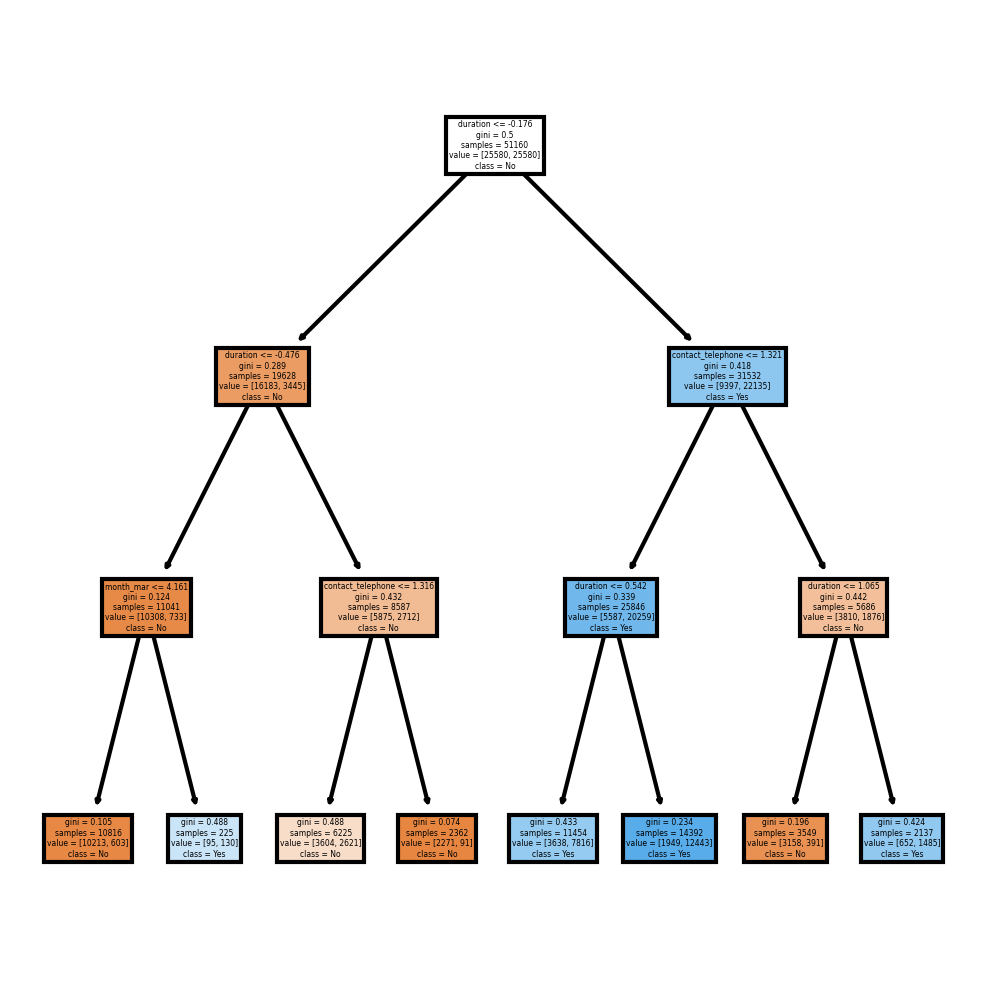

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [15]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

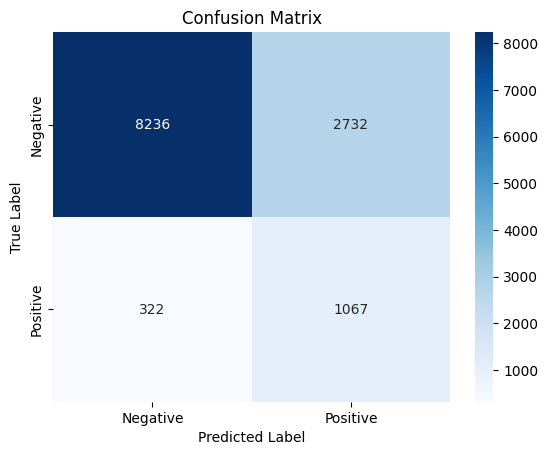

In [16]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [17]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [18]:
bagging = BaggingClassifier(estimator = dtree,
                  n_estimators = 100,
                  max_samples = 0.5,
                  max_features = 1)

bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

cm_raw_1 = confusion_matrix(y_true, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


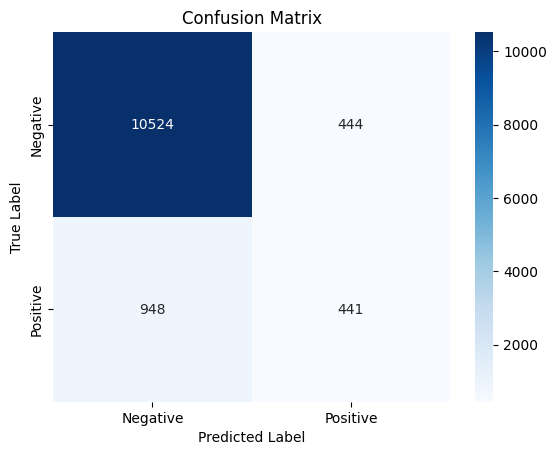

In [19]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw_1, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [22]:
boost = AdaBoostClassifier(estimator = dtree,
                  n_estimators = 50)

boost.fit(X_scaled, y_train)

y_pred = boost.predict(X_test)

cm_raw_2 = confusion_matrix(y_true, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


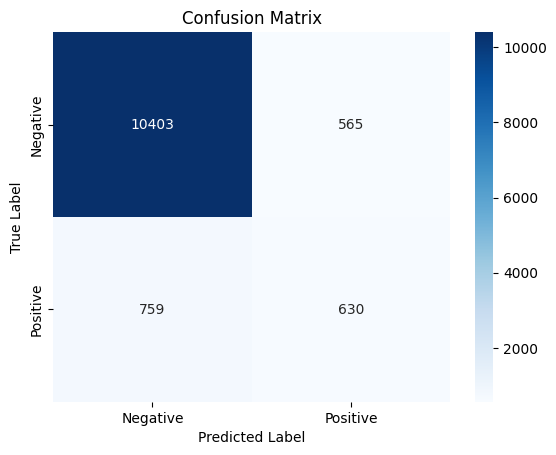

In [23]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw_2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# Train a logistic Regression on the decision tree, boosted tree, bagged tree.
# interpret coefficient and significance

In [26]:
bagging.predict(X_train)
boost.predict(X_train)
dtree_main.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [27]:
X_base_learners = np.array([bagging.predict(X_scaled), boost.predict(X_scaled), dtree_main.predict(X_scaled)])

In [28]:
super_learner = LogisticRegression()

In [29]:
# Assuming bagging, boost, and dtree_main are your base models
predictions = [bagging.predict(X_scaled), boost.predict(X_scaled), dtree_main.predict(X_scaled)]

# Stack predictions horizontally to create a feature matrix for the super learner
# Each model's predictions become a column in the matrix
X_base_learners = np.column_stack(predictions)

# Now fit the super learner
super_learner = LogisticRegression()
super_learner.fit(X_base_learners, y_train)
super_learner.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1.96682239, 3.97798901, 1.18502992]])

Coefficient for Bagging Predictor (2.1705274): This positive coefficient suggests that when the bagging predictor outputs a higher value, the log odds of the target variable being class '1' increase. This model's predictions have a substantial impact on the final prediction of the super learner.

Coefficient for Boosting Predictor (4.11074535): This is the highest positive coefficient among the three. It indicates a strong positive relationship between the boosting predictor's output and the log odds of the target variable being class '1'. This model is the most influential of the three in the super learner's final prediction.

Coefficient for Decision Tree Predictor (1.56692745): Although this is a positive coefficient and indicates that higher predictions from the decision tree model are associated with higher log odds of the target being class '1', it is less influential than the boosting model but more so than the bagging model in the context of this super learner.

# 6.)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

Best Hyperparameters: {'base_estimator': LogisticRegression(), 'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 50}
Best Accuracy Score: 0.9289999999999999
